In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


<Axes: xlabel='f1', ylabel='f2'>

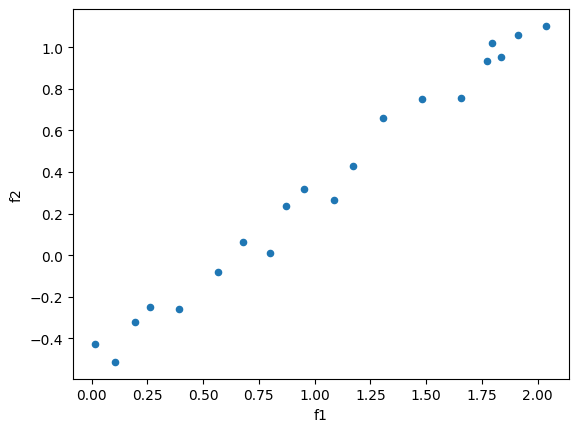

In [3]:
data.plot(x='f1', y='f2', kind='scatter')

### Fully from scratch

In [4]:


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        print("Eigen_value", eigenvalues[0 : self.n_components])
        print("Eigen_vector ",eigenvectors[0 : self.n_components])
        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)
    

In [5]:
X = data.values

In [6]:
pca = PCA(1)
pca.fit(X)
X_projected = pca.transform(X)

Eigen_value [0.72708225]
Eigen_vector  [[0.77314321 0.63423148]]


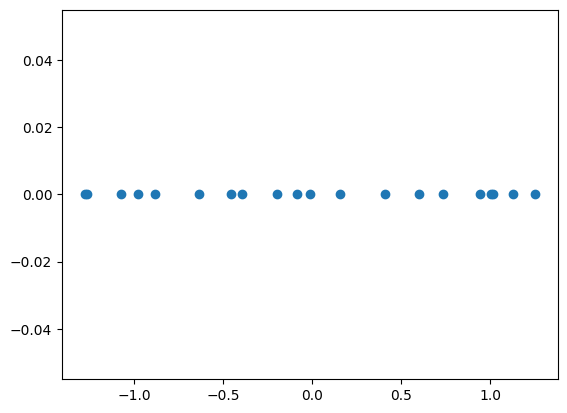

In [7]:
# Visualise
plt.figure()
plt.scatter(X_projected, np.zeros((len(X_projected),)))
plt.show()

### Using helper Libraries

### Use SK-Learn

(20, 1)


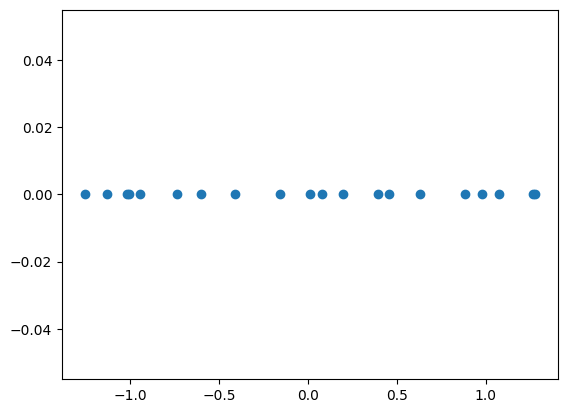

In [8]:
from sklearn.decomposition import PCA
data_sc = data -data.mean(axis=0)
model = PCA(n_components=1)
X_p = model.fit_transform(data_sc)
print(X_p.shape)
plt.figure()
plt.scatter(X_p, np.zeros((len(data_sc),)))
plt.show()

In [9]:
model.components_

array([[-0.77314321, -0.63423148]])

In [10]:
model.explained_variance_

array([0.72708225])

In [11]:
model.explained_variance_ratio_

array([0.99630883])

In [12]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
#Sorted in decreasing order
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.93954312 0.06045688]
[0.99244289 0.00755711]


---

# Images

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,10)
from matplotlib.pyplot import cm
import seaborn as sns

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

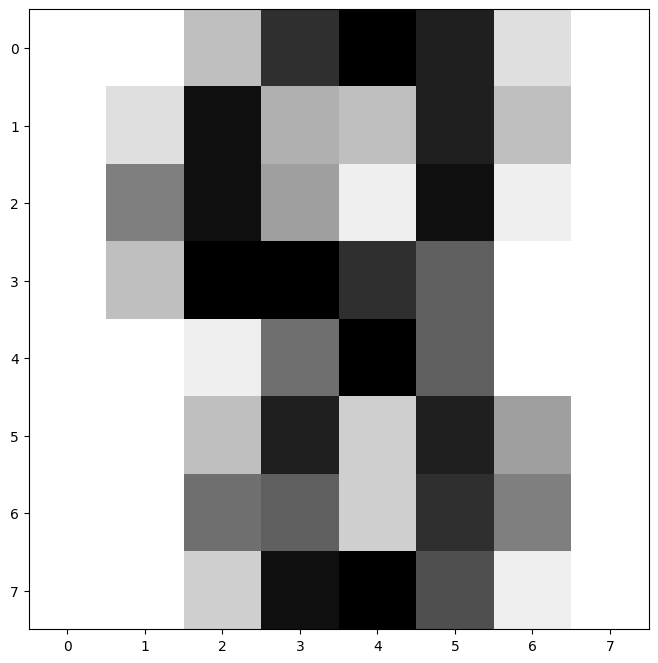

In [15]:
plt.imshow(digits.images[309], cmap=plt.cm.gray_r)

In [16]:
digits.images[309]

array([[ 0.,  0.,  4., 13., 16., 14.,  2.,  0.],
       [ 0.,  2., 15.,  5.,  4., 14.,  4.,  0.],
       [ 0.,  8., 15.,  6.,  1., 15.,  1.,  0.],
       [ 0.,  4., 16., 16., 13., 10.,  0.,  0.],
       [ 0.,  0.,  1.,  9., 16., 10.,  0.,  0.],
       [ 0.,  0.,  4., 14.,  3., 14.,  6.,  0.],
       [ 0.,  0.,  9., 10.,  3., 13.,  8.,  0.],
       [ 0.,  0.,  3., 15., 16., 11.,  1.,  0.]])

In [17]:
X = digits.data
Y = digits.target  # we just use for visualisation not for algorithm

In [18]:
X.shape

(1797, 64)

In [19]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

In [20]:
%%time

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
z1 = pca.transform(X)

CPU times: total: 0 ns
Wall time: 21.1 ms


In [21]:
X.shape

(1797, 64)

In [22]:
z1.shape

(1797, 2)

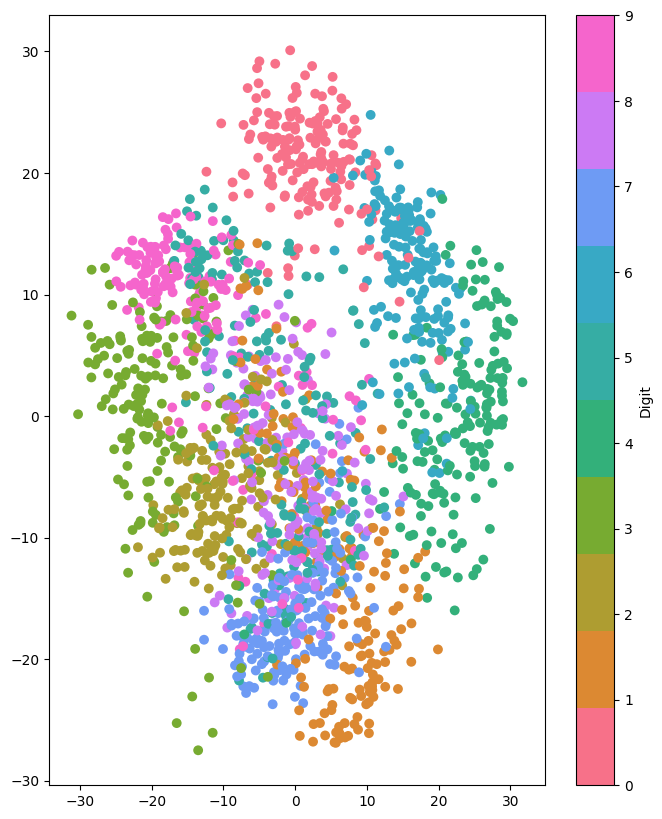

In [23]:
fig, ax = plt.subplots()
im = ax.scatter(z1[:,0], z1[:,1], s=50, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32).fit(X)
z1 = pca.transform(X)
sum(pca.explained_variance_ratio_)

0.966346422012544

## TSNE

In [25]:
%%time
from sklearn.manifold import TSNE
z2 = TSNE(n_jobs=-1, random_state=42).fit_transform(X)

CPU times: total: 18 s
Wall time: 4.45 s


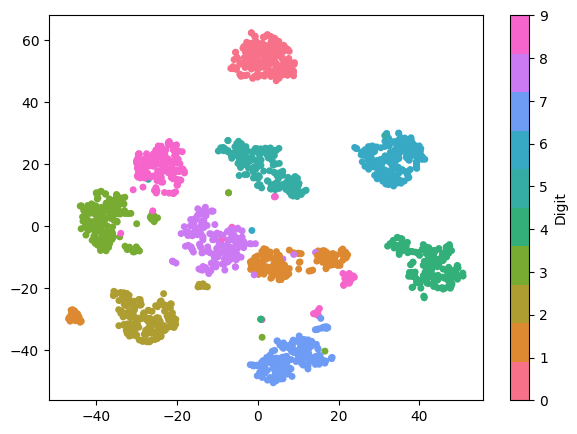

In [26]:
fig, ax = plt.subplots(figsize=[7,5])
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

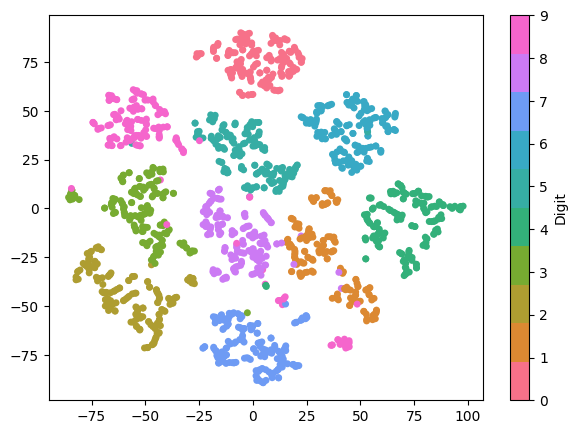

In [27]:
z2 = TSNE(perplexity=5).fit_transform(X)
fig, ax = plt.subplots(figsize=[7,5])
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [28]:
!pip install umap-learn

In [30]:
%%time
from umap import UMAP
z3 = UMAP()  #.fit_transform(X)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [ ]:
UMAP

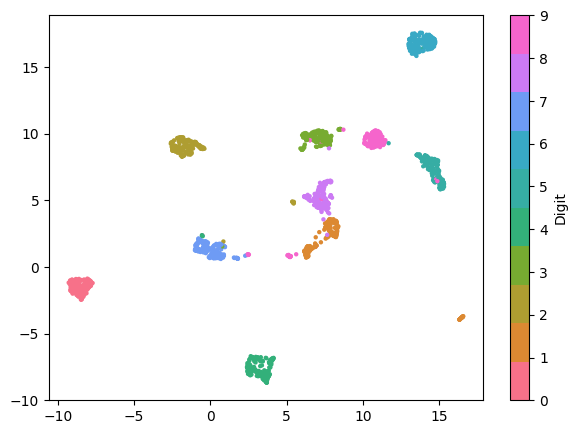

In [33]:
fig, ax = plt.subplots(figsize=[7,5])
im = ax.scatter(z3[:,0], z3[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')